<a href="https://colab.research.google.com/github/Almehrab/Computer-Vision-Project/blob/Training-and-testing-our-results/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <a href="https://ultralytics.com/yolo" target="_blank">
    <img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png">
  </a>

  [中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [Türkçe](https://docs.ultralytics.com/tr/) | [Tiếng Việt](https://docs.ultralytics.com/vi/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml"><img src="https://github.com/ultralytics/ultralytics/actions/workflows/ci.yml/badge.svg" alt="Ultralytics CI"></a>
  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/models/ultralytics/yolo11"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>

  <a href="https://ultralytics.com/discord"><img alt="Discord" src="https://img.shields.io/discord/1089800235347353640?logo=discord&logoColor=white&label=Discord&color=blue"></a>
  <a href="https://community.ultralytics.com"><img alt="Ultralytics Forums" src="https://img.shields.io/discourse/users?server=https%3A%2F%2Fcommunity.ultralytics.com&logo=discourse&label=Forums&color=blue"></a>
  <a href="https://reddit.com/r/ultralytics"><img alt="Ultralytics Reddit" src="https://img.shields.io/reddit/subreddit-subscribers/ultralytics?style=flat&logo=reddit&logoColor=white&label=Reddit&color=blue"></a>
</div>

This **Ultralytics YOLOv5 Colab Notebook** is the easiest way to get started with [YOLO models](https://www.ultralytics.com/yolo)—no installation needed. Built by [Ultralytics](https://www.ultralytics.com/), the creators of YOLO, this notebook walks you through running **state-of-the-art** models directly in your browser.

Ultralytics models are constantly updated for performance and flexibility. They're **fast**, **accurate**, and **easy to use**, and they excel at [object detection](https://docs.ultralytics.com/tasks/detect/), [tracking](https://docs.ultralytics.com/modes/track/), [instance segmentation](https://docs.ultralytics.com/tasks/segment/), [image classification](https://docs.ultralytics.com/tasks/classify/), and [pose estimation](https://docs.ultralytics.com/tasks/pose/).

Find detailed documentation in the [Ultralytics Docs](https://docs.ultralytics.com/). Get support via [GitHub Issues](https://github.com/ultralytics/ultralytics/issues/new/choose). Join discussions on [Discord](https://discord.com/invite/ultralytics), [Reddit](https://www.reddit.com/r/ultralytics/), and the [Ultralytics Community Forums](https://community.ultralytics.com/)!

Request an Enterprise License for commercial use at [Ultralytics Licensing](https://www.ultralytics.com/license).

<br>
<div>
  <a href="https://www.youtube.com/watch?v=ZN3nRZT7b24" target="_blank">
    <img src="https://img.youtube.com/vi/ZN3nRZT7b24/maxresdefault.jpg" alt="Ultralytics Video" width="640" style="border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
  </a>

  <p style="font-size: 16px; font-family: Arial, sans-serif; color: #555;">
    <strong>Watch: </strong> How to Train
    <a href="https://github.com/ultralytics/ultralytics">Ultralytics</a>
    <a href="https://docs.ultralytics.com/models/yolo11/">YOLO11</a> Model on Custom Dataset using Google Colab Notebook 🚀
  </p>
</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
%cd /content
!git clone -q https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -q -r requirements.txt
!pip install -q deepface==0.0.93 opencv-python-headless==4.10.0.84 scikit-learn==1.5.2 matplotlib==3.9.2 pandas==2.2.3


/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [ ]:
YOLO_DATA_ROOT = "/content/drive/MyDrive/yolo_dataset"
KNOWN_FACES_ROOT = "/content/drive/MyDrive/Own Dataset/known_faces"  # Tawsif/, Nina/
DATA_YAML_PATH = "/content/yolo_data.yaml"
HYP_YAML_PATH = "/content/hyp_fast15.yaml"


In [ ]:
data_yaml = f"""
train: {YOLO_DATA_ROOT}/images/train
val: {YOLO_DATA_ROOT}/images/val

nc: 1
names: ["face"]
"""
with open(DATA_YAML_PATH, "w") as f:
    f.write(data_yaml)


In [ ]:
hyp_yaml = """
lr0: 0.01
lrf: 0.2
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 1.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 3.0
translate: 0.05
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 0.8
mixup: 0.1
copy_paste: 0.0

box: 0.05
cls: 0.3
obj: 0.6
cls_pw: 1.0
obj_pw: 1.0
fl_gamma: 0.0

anchor_t: 4.0
"""
with open("/content/hyp_fast15.yaml","w") as f:
    f.write(hyp_yaml)


In [ ]:
!cat /content/hyp_fast15.yaml



lr0: 0.01
lrf: 0.2
momentum: 0.937
weight_decay: 0.0005
warmup_epochs: 1.0
warmup_momentum: 0.8
warmup_bias_lr: 0.1

hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
degrees: 3.0
translate: 0.05
scale: 0.5
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5
mosaic: 0.8
mixup: 0.1
copy_paste: 0.0

box: 0.05
cls: 0.3
obj: 0.6
cls_pw: 1.0
obj_pw: 1.0
fl_gamma: 0.0

anchor_t: 4.0


In [ ]:
!python train.py --img 640 --batch 16 --epochs 15 --data /content/yolo_data.yaml --weights yolov5s.pt --hyp /content/hyp_fast15.yaml --project /content/yolo_runs --name face_det --exist-ok


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-31 00:28:02.744249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761870482.765485    9638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761870482.771881    9638 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761870482.788258    9638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761870482.788284    9638 computation_placer.cc:177] computation placer already registere

In [66]:
import glob, os
TRAIN_DIR = sorted(glob.glob("/content/yolo_runs/face_det*"))[-1]
BEST_WEIGHTS = os.path.join(TRAIN_DIR, "weights", "best.pt")
RESULTS_CSV = os.path.join(TRAIN_DIR, "results.csv")


In [67]:
!python val.py --weights {BEST_WEIGHTS} --data {DATA_YAML_PATH} --img 640 --project /content/yolo_runs --name face_val --exist-ok

VAL_DIR = "/content/yolo_runs/face_val"


val: data=/content/yolo_data.yaml, weights=['/content/yolo_runs/face_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/yolo_runs, name=face_val, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolo_dataset/labels/val.cache... 619 images, 81 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 22/22 [00:28<00:00,  1.31s/it]
                   all        700        620      0.944      0.982      0.978      0.803
Speed: 0.2ms pre-process, 5.1ms inference, 2.8ms NMS per image at shape (32

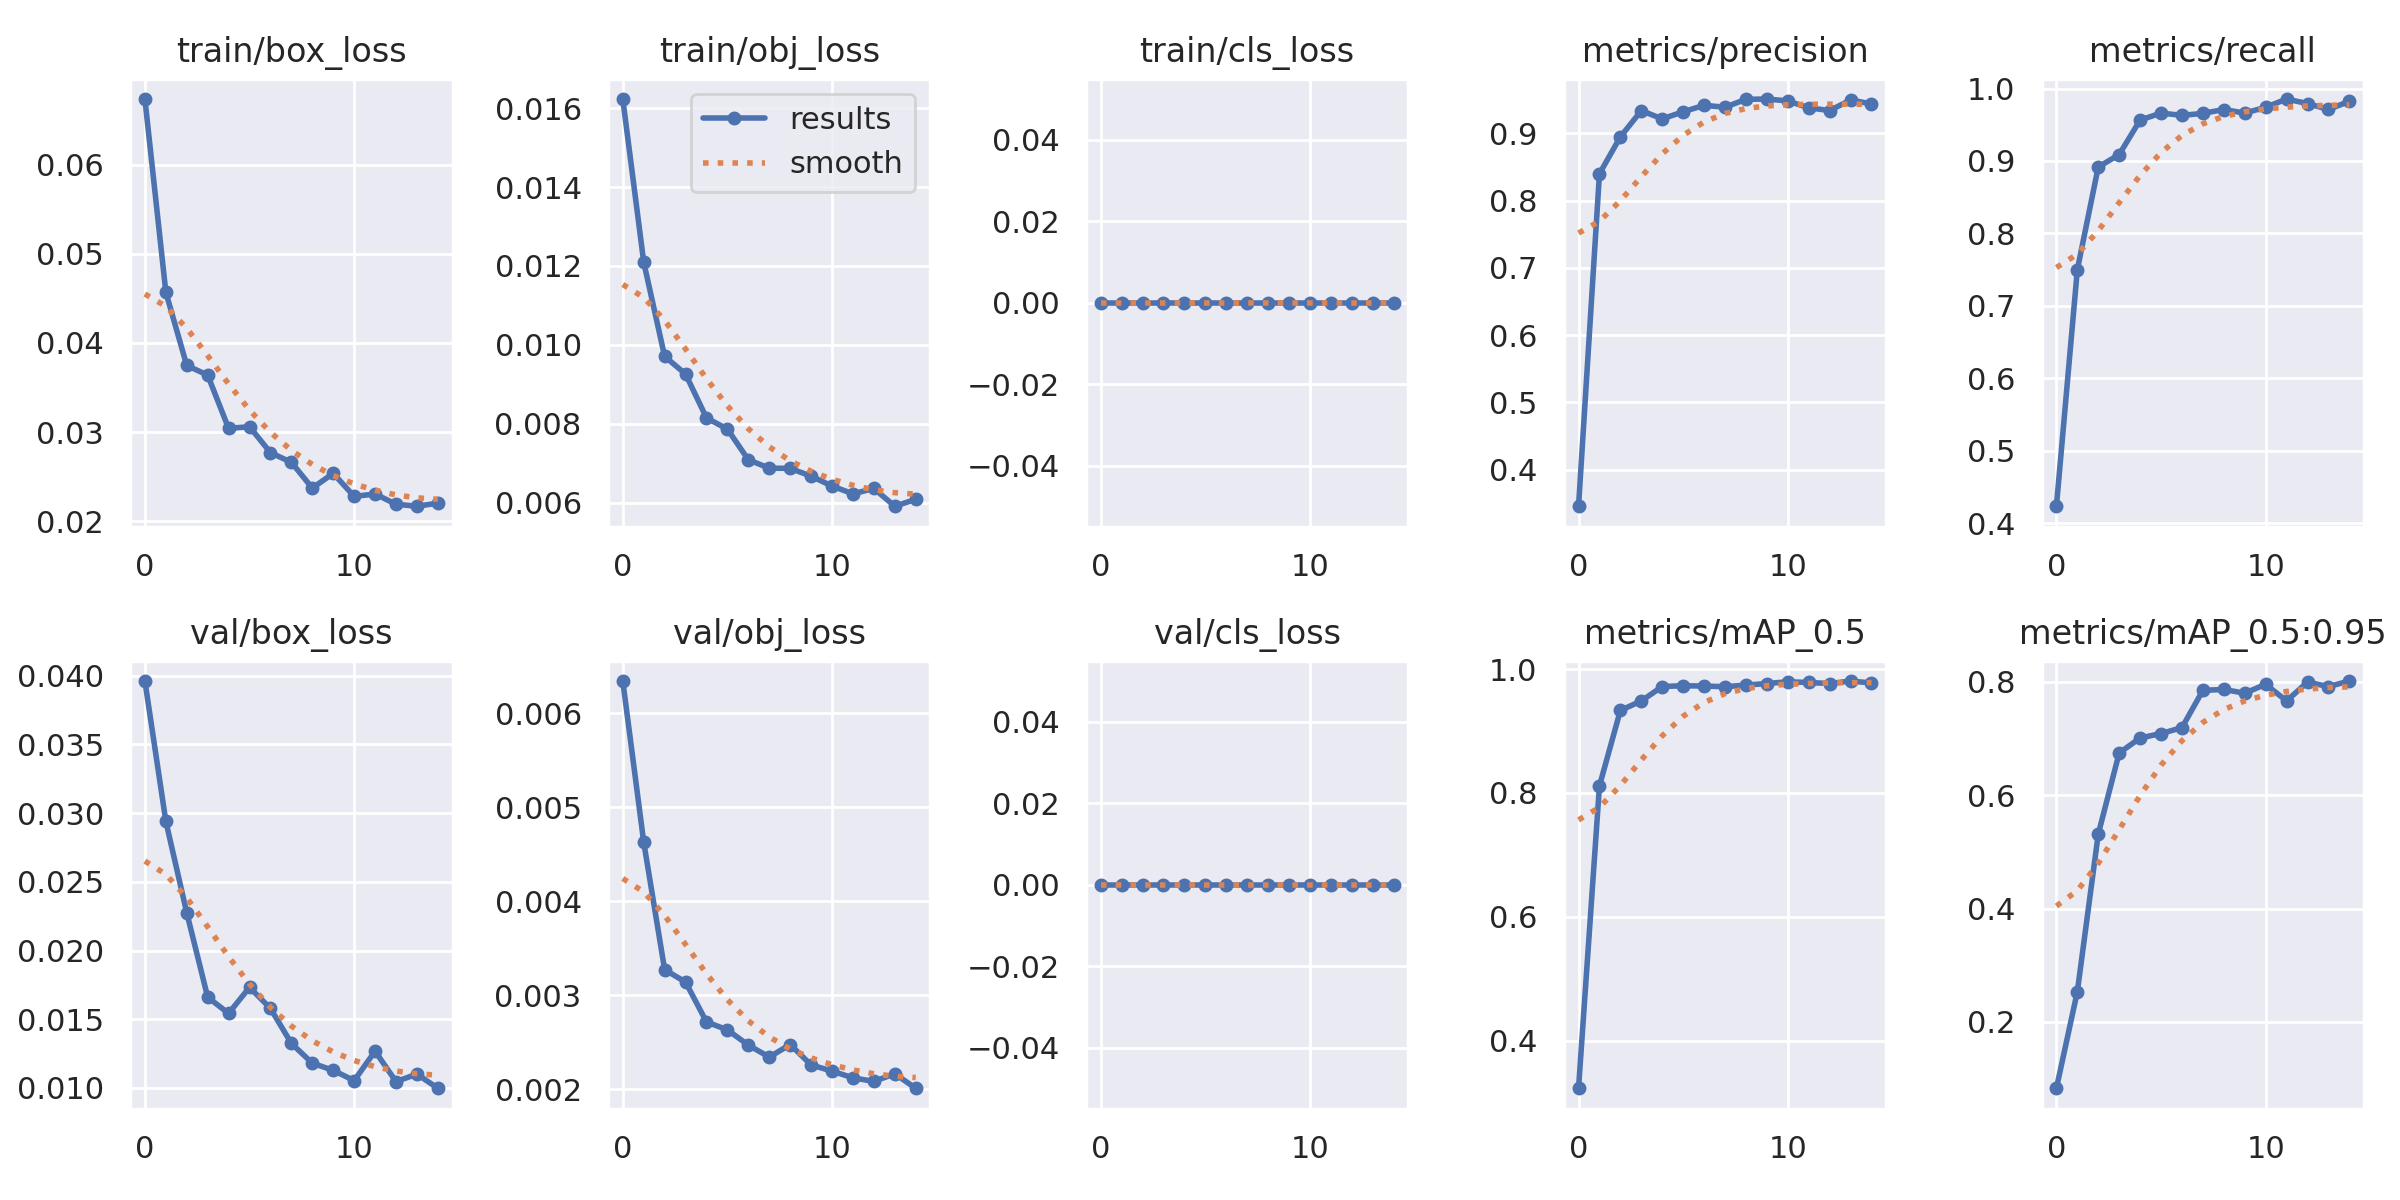

In [71]:
from IPython.display import Image, display

display(Image(filename="/content/yolo_runs/face_det/results.png"))


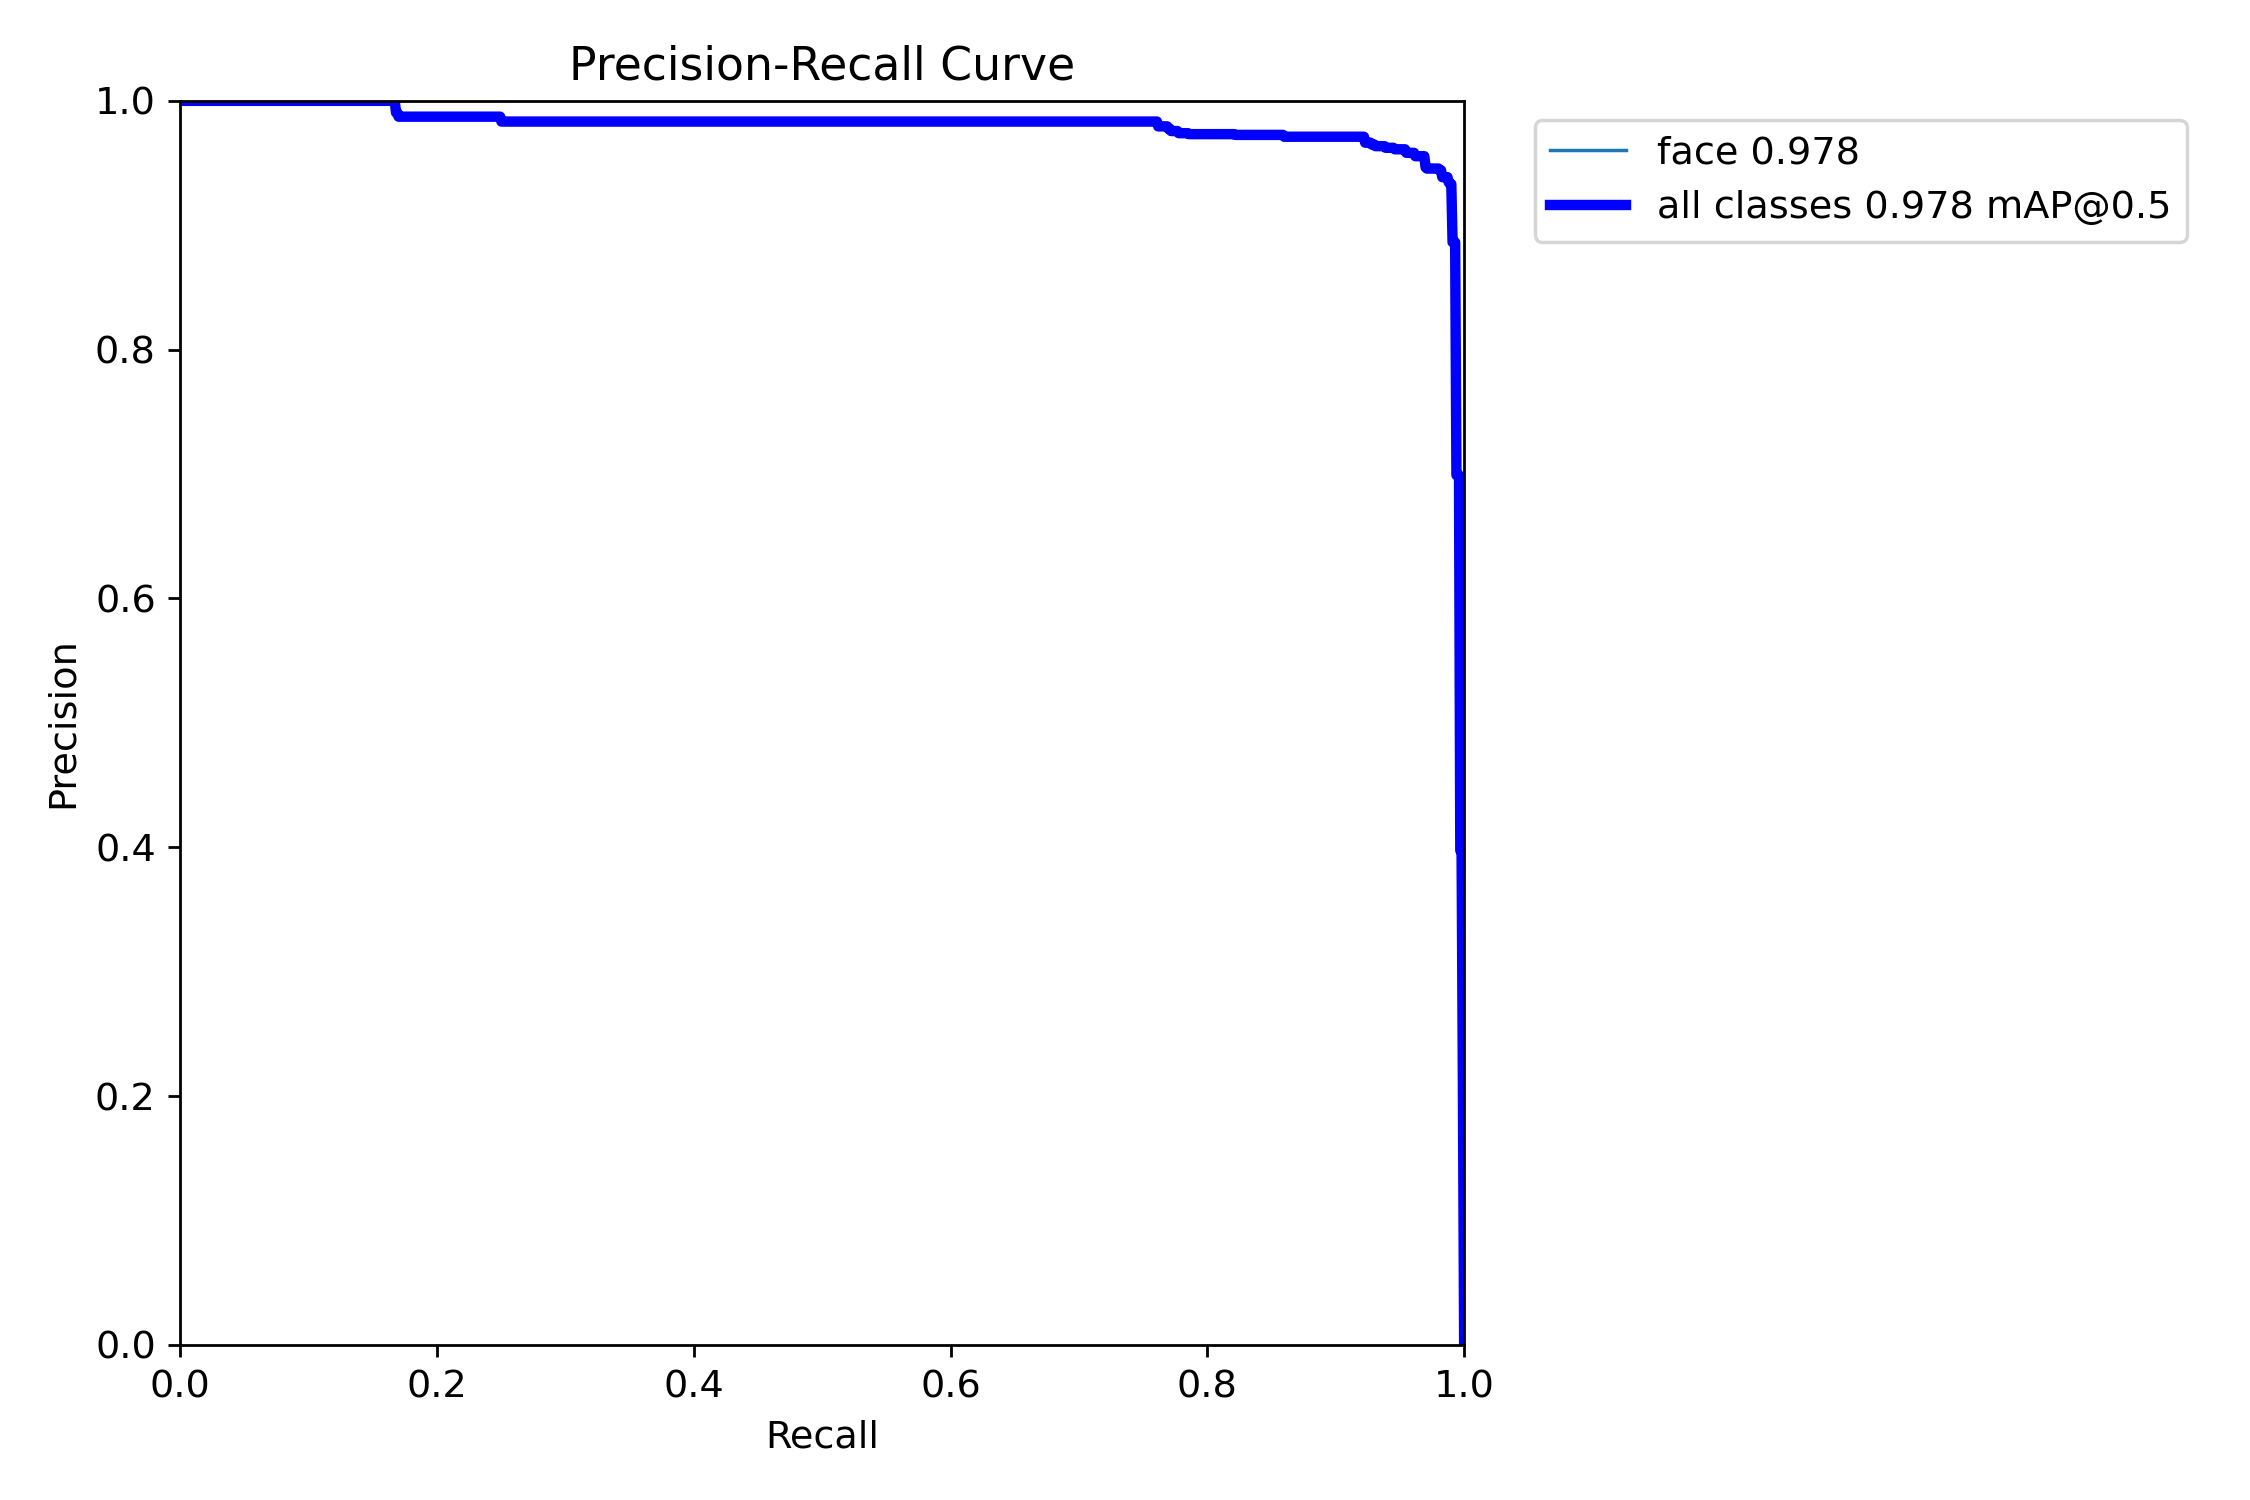

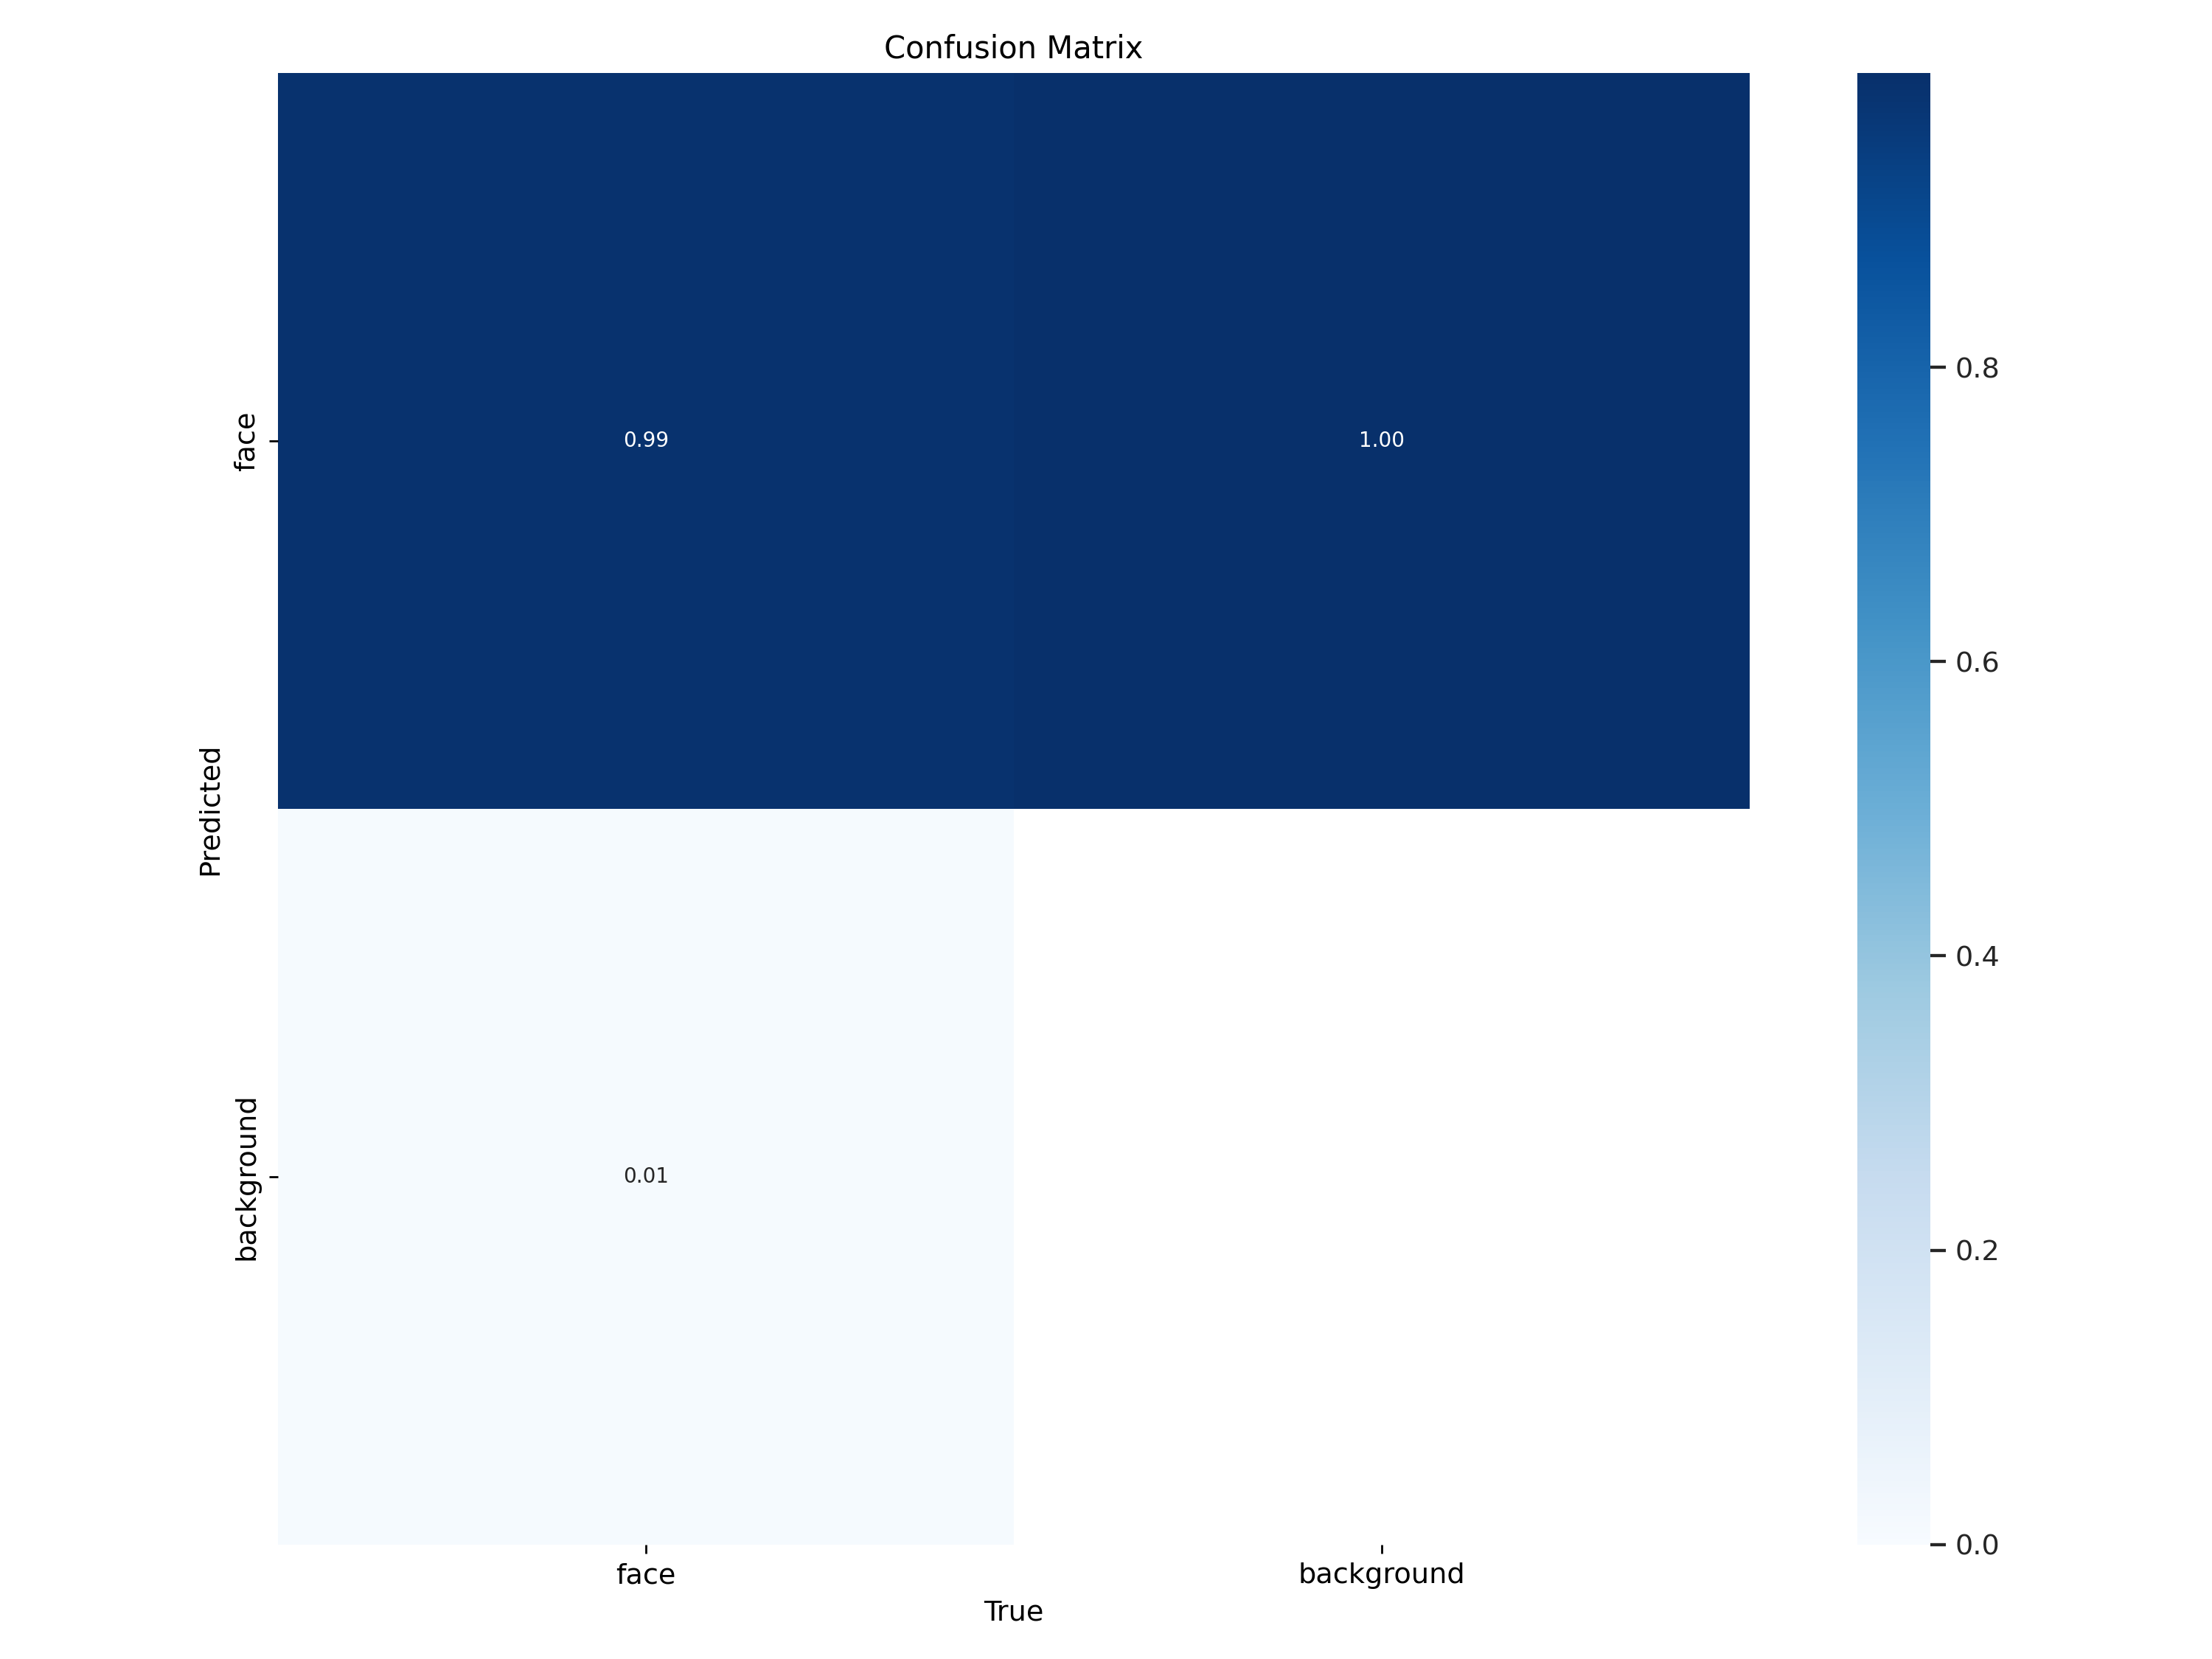

FileNotFoundError: [Errno 2] No such file or directory: '/content/yolo_runs/face_det/confusion_matrix_normalized.png'

In [94]:
display(Image(filename="/content/yolo_runs/face_det/PR_curve.png"))
display(Image(filename="/content/yolo_runs/face_det/confusion_matrix.png"))
display(Image(filename="/content/yolo_runs/face_det/confusion_matrix_normalized.png"))


In [73]:
import pandas as pd

df = pd.read_csv("/content/yolo_runs/face_det/results.csv")
df.tail()  # last epoch summary


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
10,10,0.022776,0.006420,0,0.94819,0.97412,0.97953,0.79582,0.010531,0.002191,0,0.005200,0.005200,0.005200
11,11,0.023052,0.006222,0,0.93798,0.98548,0.97846,0.76639,0.012673,0.002119,0,0.004667,0.004667,0.004667
12,12,0.021901,0.006358,0,0.93386,0.97919,0.97667,0.79975,0.010459,0.002081,0,0.004133,0.004133,0.004133
13,13,0.021674,0.005908,0,0.94954,0.97118,0.98077,0.79179,0.011005,0.002162,0,0.003600,0.003600,0.003600
14,14,0.022021,0.006084,0,0.94375,0.98226,0.97765,0.80159,0.009974,0.002008,0,0.003067,0.003067,0.003067


In [ ]:
BEST_WEIGHTS = "/content/yolo_runs/face_det/weights/best.pt"

!python val.py --weights $BEST_WEIGHTS --data /content/yolo_data.yaml --img 640 --project /content/yolo_runs --name face_val --exist-ok


val: data=/content/yolo_data.yaml, weights=['/content/yolo_runs/face_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/yolo_runs, name=face_val, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/yolo_dataset/labels/val.cache... 619 images, 81 backgrounds, 0 corrupt: 100% 700/700 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 22/22 [00:27<00:00,  1.25s/it]
                   all        700        620      0.944      0.982      0.978      0.803
Speed: 0.2ms pre-process, 4.9ms inference, 2.5ms NMS per image at shape (32

In [74]:
!python detect.py --weights /content/yolo_runs/face_det/weights/best.pt \
--source "/content/drive/MyDrive/Own Dataset/known_faces/**/*" \
--img 640 --save-conf --save-txt --save-crop \
--project /content/yolo_runs --name recog_faces --exist-ok


detect: weights=['/content/yolo_runs/face_det/weights/best.pt'], source=/content/drive/MyDrive/Own Dataset/known_faces/**/*, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/yolo_runs, name=recog_faces, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-444-g1f1e7b90 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/46 /content/drive/MyDrive/Own Dataset/known_faces/Nina/face_031.jpg: 640x448 1 face, 35.7ms
image 2/46 /content/drive/MyDrive/Own Dataset/known_faces/Nina/face_032.jpg: 640x448 1 face, 8.4ms
image 3/46 /content/drive/MyDrive/Own Dataset/known_faces/N

In [77]:
from deepface import DeepFace
import numpy as np, os

KNOWN_ROOT = "/content/drive/MyDrive/Own Dataset/known_faces"
embedding_db = {}

for person in sorted(os.listdir(KNOWN_ROOT)):
    folder = os.path.join(KNOWN_ROOT, person)
    if not os.path.isdir(folder): continue

    vectors = []
    for img in os.listdir(folder):
        if img.lower().endswith(('.jpg','.jpeg','.png')):
            rep = DeepFace.represent(os.path.join(folder, img), model_name="Facenet", enforce_detection=False)[0]['embedding']
            vectors.append(np.array(rep, dtype=np.float32))

    embedding_db[person] = np.stack(vectors, axis=0)

embedding_db.keys()


dict_keys(['Nina', 'Tawsif'])

In [79]:
def cosine_sim(a,b):
    a = a / (np.linalg.norm(a)+1e-9)
    b = b / (np.linalg.norm(b)+1e-9)
    return np.dot(a,b)

def identify(vec, db, thr=0.80):
    best, score = "UNKNOWN", 0.0
    for person, stored in db.items():
        sims = stored @ (vec/(np.linalg.norm(vec)+1e-9))
        s = np.max(sims)
        if s > score:
            score = s; best = person
    return (best if score >= thr else "UNKNOWN"), score


In [98]:
import cv2, os
OUTPUT_DIR = "/content/doorlock_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

CROPS = "/content/yolo_runs/recog_faces/crops/face"

for img_name in os.listdir(CROPS):
    if not img_name.lower().endswith(('.jpg','.jpeg','.png')):
        continue

    img_path = os.path.join(CROPS, img_name)
    img = cv2.imread(img_path)

    rep = DeepFace.represent(img, model_name="Facenet", enforce_detection=False)[0]['embedding']
    vec = np.array(rep, dtype=np.float32)
    name, score = identify(vec, embedding_db)

    color = (0,0,255) if name != "UNKNOWN" else (0,255,0)
    cv2.rectangle(img, (0,0), (img.shape[1], img.shape[0]), color, 2)
    cv2.putText(img, f"{name} {score:.2f}", (5,25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    cv2.imwrite(os.path.join(OUTPUT_DIR, img_name), img)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 24.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 41.5ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 60.0ms
Speed: 0.5ms pre-process, 50.8ms inference, 37.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://github.com/ultralytics/assets/releases/download/v0.0.0/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:12<00:00, 66.6MB/s]


In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2024.59it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:25<00:00,  1.84it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 3.1ms inference, 2.3ms NMS per image at shape (32,

# 3. Train

<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/datasets/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

2023-04-09 14:11:38.063605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 14:11:39.026661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_inter

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/models/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True, trust_repo=True)  # or yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.